In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
of = pd.read_excel('../../data/raw/OF 123456.xlsx')

of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Orden                 205 non-null    int64         
 1   Número material       205 non-null    int64         
 2   Texto breve material  205 non-null    object        
 3   Lote                  205 non-null    object        
 4   Fecha de inicio real  205 non-null    datetime64[ns]
 5   Fecha de fin real     205 non-null    datetime64[ns]
 6   Cantidad entregada    205 non-null    float64       
 7   Unidad de medida      205 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 12.9+ KB


In [92]:
of.head()

,Orden,Número material,Texto breve material,Lote,Fecha de inicio real,Fecha de fin real,Cantidad entregada,Unidad de medida
0,200178572,123456,MATERIAL DESCRITION,23/019,2023-04-24,2023-04-24,13.8,L
1,200179217,123456,MATERIAL DESCRITION,23/020,2023-04-24,2023-04-24,13.6,L
2,200181620,123456,MATERIAL DESCRITION,23/021,2023-04-25,2023-04-25,13.5,L
3,200182428,123456,MATERIAL DESCRITION,23/022,2023-04-25,2023-04-25,13.8,L
4,200182429,123456,MATERIAL DESCRITION,23/023,2023-05-02,2023-05-02,13.7,L


# Sanity checks

In [93]:
#Drop column 'Texto breve material' because it is not useful
of.drop(columns=['Texto breve material'], inplace=True)

In [94]:
# Check Unidad de medida if it is always L
print(of['Unidad de medida'].unique())

['L']


In [95]:
# Drop column 'Unidad de medida' because it is always L
of.drop(columns=['Unidad de medida'], inplace=True)

In [96]:
# Numero material unique values
print(of['Número material'].value_counts())

Número material
123456    205
Name: count, dtype: int64


In [97]:
# Makes sense there is only one antigen material for our study. Drop column 'Número material' as it does not add any information
of.drop(columns=['Número material'], inplace=True)

### We end up with 5 columns. 2 Out of them are 2 dates in datetime format, another 2 are identifiers and the last one is a number.

In [98]:
of.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Orden                 205 non-null    int64         
 1   Lote                  205 non-null    object        
 2   Fecha de inicio real  205 non-null    datetime64[ns]
 3   Fecha de fin real     205 non-null    datetime64[ns]
 4   Cantidad entregada    205 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(1)
memory usage: 8.1+ KB


# Columns

## Orden


In [99]:
# Let's be sure Orden is unique
print(of['Orden'].nunique()==of.shape[0])

True


In [100]:
# We dont need Orden as an int for this use case. It is an identifier. Let's convert it to a string
of['Orden'] = of['Orden'].astype(str)

In [101]:
# Look for weird values with regex
print('Number of non-word characters: ' + str(of['Orden'].str.count('\W').sum()))
print('Number of non-digit characters: ' + str(of['Orden'].str.count('\D').sum()))

Number of non-word characters: 0
Number of non-digit characters: 0


In [102]:
# Look if the number of digits is consistent
print(of[~of['Orden'].str.match('^\d{9}$')])

        Orden    Lote Fecha de inicio real Fecha de fin real  \
42   10005176  P23273           2023-07-05        2023-08-08   
92   10005233  23/121           2023-11-23        2023-12-26   
98   10005235  23/126           2023-11-28        2024-01-02   
99   10005236  23/127           2023-11-28        2024-01-02   
138  10005271  24/038           2024-02-21        2024-03-26   

     Cantidad entregada  
42                13.80  
92                13.60  
98                13.60  
99                13.60  
138               13.89  


In [103]:
# Prefixes 
print(of['Orden'].str.extract('(\d{3})\d*')[0].unique())
print(of['Orden'].str.extract('(\d{3})\d*')[0].value_counts())

print(of['Orden'].str.extract('(\d{4})\d*')[0].unique())
print(of['Orden'].str.extract('(\d{4})\d*')[0].value_counts())

print(of['Orden'].str.extract('(\d{5})\d*')[0].unique())
print(of['Orden'].str.extract('(\d{5})\d*')[0].value_counts())

['200' '100']
0
200    200
100      5
Name: count, dtype: int64
['2001' '1000' '2002']
0
2001    130
2002     70
1000      5
Name: count, dtype: int64
['20017' '20018' '10005' '20019' '20020']
0
20019    75
20020    70
20018    53
10005     5
20017     2
Name: count, dtype: int64


In [104]:
print(of['Orden'].str.extract('(\d{6})\d*')[0].unique())
print(of['Orden'].str.extract('(\d{6})\d*')[0].value_counts())

['200178' '200179' '200181' '200182' '200185' '200184' '200187' '100051'
 '200188' '200191' '200195' '200196' '100052' '200197' '200199' '200200'
 '200202' '200205' '200203']
0
200196    38
200205    30
200191    28
200200    27
200182    18
200202    12
200188    11
200184    11
200187    10
200195     6
100052     4
200199     2
200185     2
200178     1
200179     1
200181     1
100051     1
200197     1
200203     1
Name: count, dtype: int64


### It is likely Orden is a combination of codes. With likely the first 4(5?) digits being a category of something.

In [105]:
# Suffixes
#Which do not match this regex? (None)
print(of[~of['Orden'].str.match('\d*(\d{3})$')])
print(of['Orden'].str.extract('\d*(\d{3})$').value_counts())

Empty DataFrame
Columns: [Orden, Lote, Fecha de inicio real, Fecha de fin real, Cantidad entregada]
Index: []
0  
385    2
233    2
386    2
387    2
388    2
      ..
906    1
907    1
908    1
909    1
910    1
Name: count, Length: 194, dtype: int64


In [106]:
# Number of unique values
print(of['Orden'].str.extract('\d*(\d{3})$').nunique())
# (SEE ALSO: of['Orden'].str.slice(start=-3) )
# How many times are they repeated?
print(of['Orden'].str.extract('\d*(\d{3})$').value_counts().value_counts())
# Which are the ones that are repeated more than once?
print(of['Orden'].str.extract('\d*(\d{3})$').value_counts()[of['Orden'].str.extract('\d*(\d{3})$').value_counts()>1])

# Put them on a list
repeated_suffixes = of['Orden'].str.extract('\d*(\d{3})$').value_counts()[of['Orden'].str.extract('\d*(\d{3})$').value_counts()>1].index.tolist()
# Flatten the list
repeated_suffixes = [item for sublist in repeated_suffixes for item in sublist]

0    194
dtype: int64
count
1    183
2     11
Name: count, dtype: int64
0  
385    2
233    2
386    2
387    2
388    2
534    2
533    2
440    2
441    2
400    2
878    2
Name: count, dtype: int64


In [107]:
# Filter all the elements in the column that their 3 last digits are in the list

of[of['Orden'].str.extract('\d*(\d{3})$')[0].isin(repeated_suffixes)]
# Sort the values by their last 3 digits
#Use lock to avoid the SettingWithCopyWarning
filtered_df = of[of['Orden'].str.extract('\d*(\d{3})$')[0].isin(repeated_suffixes)].copy()
filtered_df['Last3Digits'] = filtered_df['Orden'].str[-3:]

filtered_df.sort_values(by='Last3Digits')


,Orden,Lote,Fecha de inicio real,Fecha de fin real,Cantidad entregada,Last3Digits
92,10005233,23/121,2023-11-23,2023-12-26,13.60,233
144,200200233,24/044,2024-03-16,2024-04-19,13.75,233
148,200200385,24/051,2024-03-23,2024-04-26,13.83,385
67,200191385,23/092,2023-10-03,2023-11-06,13.80,385
149,200200386,24/053,2024-03-26,2024-05-06,13.75,386
69,200191386,23/094,2023-10-09,2023-11-13,13.70,386
70,200191387,23/095,2023-10-09,2023-11-13,13.70,387
143,200200387,24/046,2024-03-11,2024-04-15,13.71,387
150,200200388,24/052,2024-03-26,2024-05-03,13.78,388
71,200191388,23/096,2023-10-16,2023-11-20,13.30,388


### There is some incremental nature to Orden, and we are obviously missing numbers in between that do not correspond to the material. We cannot conclude that there are other antigens in production between Orders but it is highly likely.

### Still there's an strong indication that the first 3/4 digits could mean something else that is not an incremental number, but some kind of category or change in procedures. Could be a potential line for investigation.

In [108]:
# Are the last 3 digits in the original dataframe incremental?
# Slice orden
of['Orden'].str[-3:].astype(int).diff().value_counts()


Orden
 1.0      92
 3.0       8
 2.0       8
 4.0       5
-2.0       3
          ..
-296.0     1
 446.0     1
-6.0       1
-8.0       1
 9.0       1
Name: count, Length: 75, dtype: int64

In [109]:
# Sort of by Orden
of = of.sort_values(by='Orden')
# Show first 20 rows
of.head(20)

,Orden,Lote,Fecha de inicio real,Fecha de fin real,Cantidad entregada
42,10005176,P23273,2023-07-05,2023-08-08,13.80
92,10005233,23/121,2023-11-23,2023-12-26,13.60
98,10005235,23/126,2023-11-28,2024-01-02,13.60
99,10005236,23/127,2023-11-28,2024-01-02,13.60
138,10005271,24/038,2024-02-21,2024-03-26,13.89
0,200178572,23/019,2023-04-24,2023-04-24,13.80
1,200179217,23/020,2023-04-24,2023-04-24,13.60
2,200181620,23/021,2023-04-25,2023-04-25,13.50
3,200182428,23/022,2023-04-25,2023-04-25,13.80
4,200182429,23/023,2023-05-02,2023-05-02,13.70


## Lote

In [110]:
# Let's be sure Lote is unique
print(of['Lote'].nunique()==of.shape[0])

True


In [111]:
# Lote does not follow the same pattern as in the other files. Let's see if we can convert the identifier.
# First to string
of['Lote'] = of['Lote'].astype(str)

In [112]:
# Now remove /
of['Lote'] = of['Lote'].apply(lambda x: x.replace("/",""))

In [113]:
# Check now for unique values
print(of['Lote'].nunique()==of.shape[0])

True


In [114]:
# Lets have a final look at the Lote column
print(of['Lote'].head())
print(of['Lote'].tail())
print(of['Lote'].sample(5))
# Check for weird values with regex
print('Number of non-word characters: ' + str(of['Lote'].str.contains(r'\W').sum()))
print('Number of non-digit characters: ' + str(of['Lote'].str.contains(r'\D').sum()))
#Print the values that contain non-digit characters (FOUND YOU!)
print(of['Lote'][of['Lote'].str.contains(r'\D')])

42     P23273
92      23121
98      23126
99      23127
138     24038
Name: Lote, dtype: object
199    24105
201    24106
202    24107
195    24100
197    24101
Name: Lote, dtype: object
58    23084
88    23113
33    23054
72    23097
64    23089
Name: Lote, dtype: object
Number of non-word characters: 0
Number of non-digit characters: 1
42    P23273
Name: Lote, dtype: object


### Lote does look like an index of ordered entries, with 23 as year SLASH ('/') and 019 as number of entry
### However there is one concerning entry that does not follow this pattern. It's value is P23273. No slash.

## Datetimes

In [115]:
#Check if all datetimes are okay and there is no null or wrong values
print(of['Fecha de inicio real'].unique())
print(of['Fecha de fin real'].unique())
print(of['Fecha de inicio real'].isnull().sum())
print(of['Fecha de fin real'].isnull().sum())


<DatetimeArray>
['2023-07-05 00:00:00', '2023-11-23 00:00:00', '2023-11-28 00:00:00',
 '2024-02-21 00:00:00', '2023-04-24 00:00:00', '2023-04-25 00:00:00',
 '2023-05-02 00:00:00', '2023-05-08 00:00:00', '2023-05-22 00:00:00',
 '2023-05-29 00:00:00',
 ...
 '2024-06-05 00:00:00', '2024-06-11 00:00:00', '2024-07-06 00:00:00',
 '2024-07-03 00:00:00', '2024-06-29 00:00:00', '2024-06-15 00:00:00',
 '2024-07-02 00:00:00', '2024-06-19 00:00:00', '2024-07-01 00:00:00',
 '2024-06-21 00:00:00']
Length: 110, dtype: datetime64[ns]
<DatetimeArray>
['2023-08-08 00:00:00', '2023-12-26 00:00:00', '2024-01-02 00:00:00',
 '2024-03-26 00:00:00', '2023-04-24 00:00:00', '2023-04-25 00:00:00',
 '2023-05-02 00:00:00', '2023-05-08 00:00:00', '2023-05-22 00:00:00',
 '2023-05-29 00:00:00', '2023-06-26 00:00:00', '2023-07-03 00:00:00',
 '2023-08-28 00:00:00', '2023-07-04 00:00:00', '2023-07-17 00:00:00',
 '2023-07-10 00:00:00', '2023-07-24 00:00:00', '2023-07-25 00:00:00',
 '2023-06-27 00:00:00', '2023-07-31 00:0

In [116]:
#Sort datetimes 
print(of['Fecha de inicio real'].sort_values())
print(of['Fecha de fin real'].sort_values())

0     2023-04-24
1     2023-04-24
2     2023-04-25
3     2023-04-25
4     2023-05-02
         ...    
198   2024-07-02
199   2024-07-02
203   2024-07-03
204   2024-07-03
200   2024-07-06
Name: Fecha de inicio real, Length: 205, dtype: datetime64[ns]
0     2023-04-24
1     2023-04-24
2     2023-04-25
3     2023-04-25
4     2023-05-02
         ...    
202   2024-08-06
204   2024-08-06
198   2024-08-09
200   2024-08-09
203   2024-08-26
Name: Fecha de fin real, Length: 205, dtype: datetime64[ns]


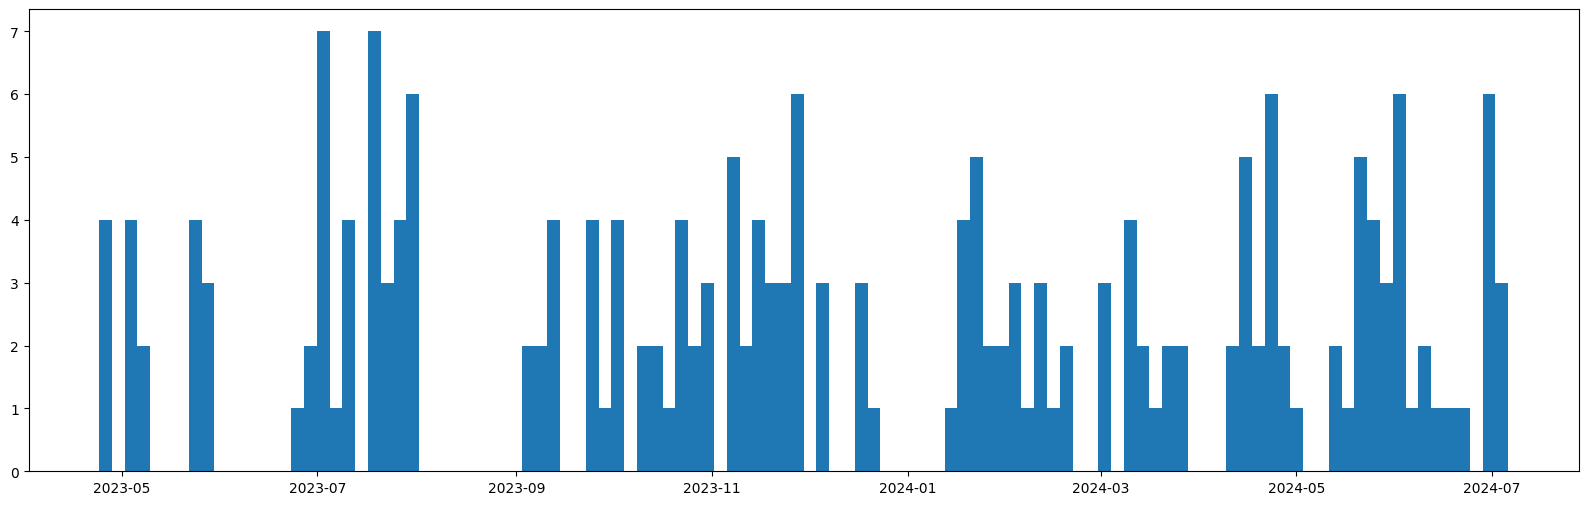

In [117]:
# Histogram of fecha de inicio real
plt.figure(figsize=(20, 6))
plt.hist(of['Fecha de inicio real'], bins=110)
plt.show()


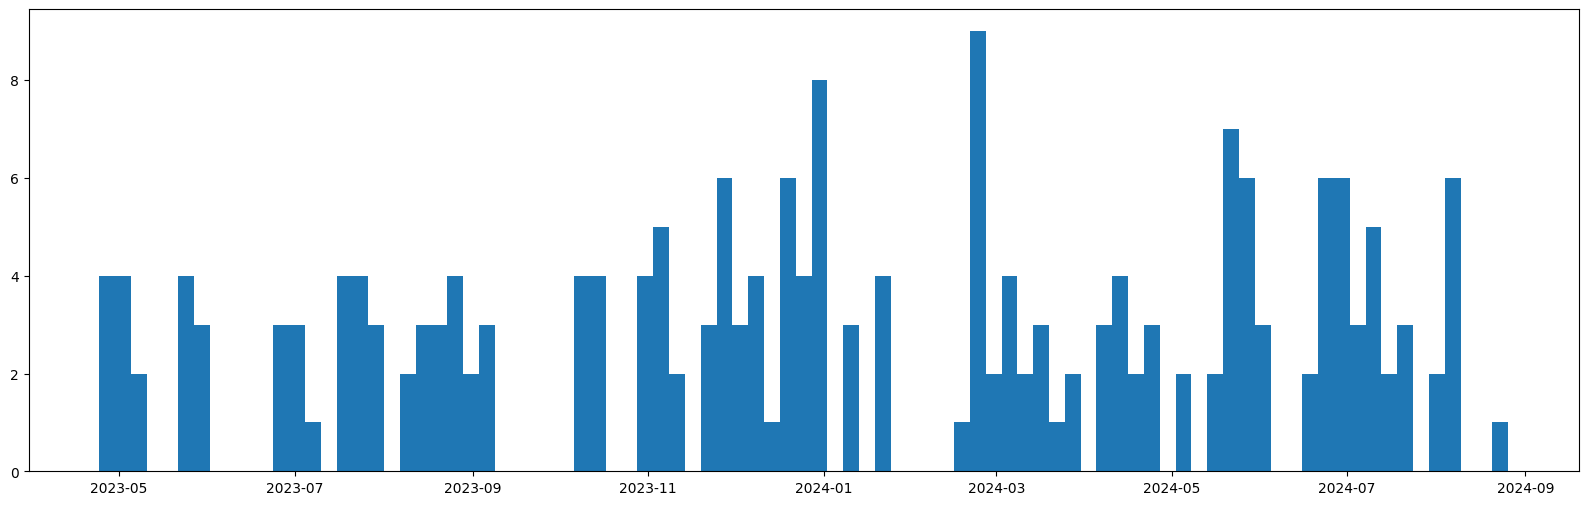

In [118]:
# Histogram of fecha de fin real
plt.figure(figsize=(20, 6))
plt.hist(of['Fecha de fin real'], bins=89)
plt.show()

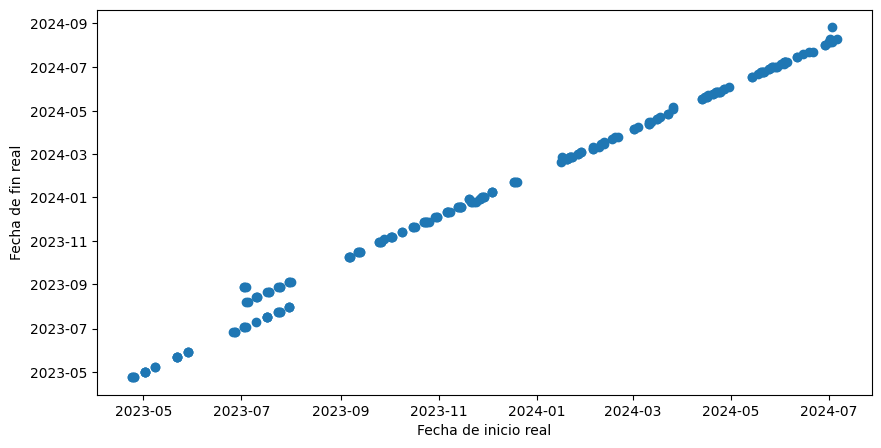

In [119]:
# Scatter plot of fecha de inicio real vs fecha de fin real
plt.figure(figsize=(10, 5))
plt.scatter(of['Fecha de inicio real'], of['Fecha de fin real'])
plt.xlabel('Fecha de inicio real')
plt.ylabel('Fecha de fin real')
plt.show()

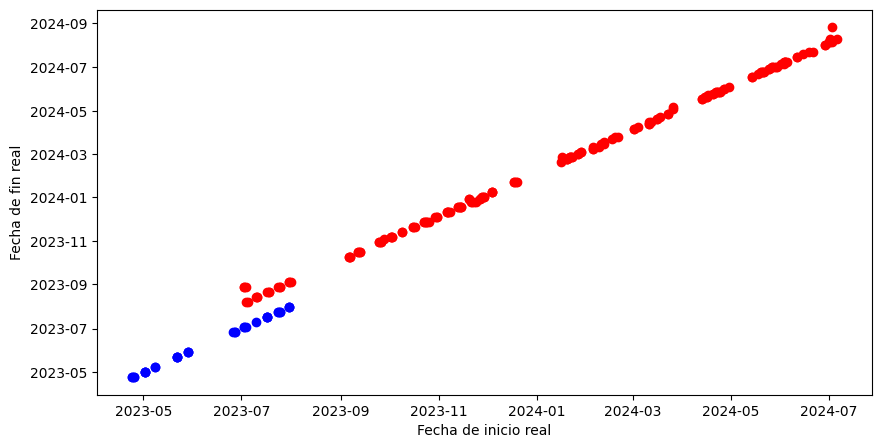

In [120]:
# Scatter plot of fecha de inicio real vs fecha de fin real
# Whenever the fecha de inicio real is greater than fecha de fin real, the point will be red
# Whenever the fecha de inicio real is less than fecha de fin real, the point will be blue
# If it is equal, it will be yellow
plt.figure(figsize=(10, 5))
for index, row in of.iterrows():
    if row['Fecha de inicio real'] > row['Fecha de fin real']:
        plt.scatter(row['Fecha de inicio real'], row['Fecha de fin real'], color='yellow')
    elif row['Fecha de inicio real'] < row['Fecha de fin real']:
        plt.scatter(row['Fecha de inicio real'], row['Fecha de fin real'], color='red')
    else:
        plt.scatter(row['Fecha de inicio real'], row['Fecha de fin real'], color='blue')
plt.xlabel('Fecha de inicio real')
plt.ylabel('Fecha de fin real')
plt.show()





In [121]:
# Duration of the OF
of['Duration'] = (of['Fecha de fin real'] - of['Fecha de inicio real']).dt.days
dur_sorted = of['Duration'].sort_values()
print(dur_sorted.iloc[0])
print(dur_sorted.iloc[-1])


0
56


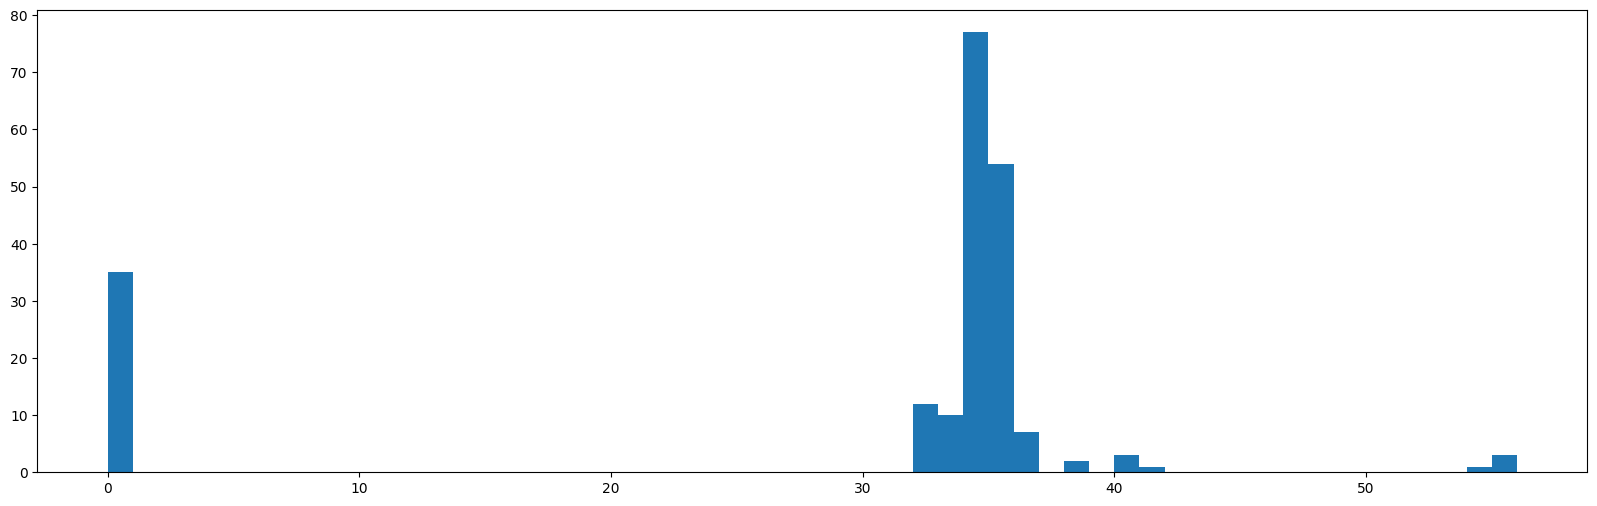

In [122]:
# Histogram of duration
plt.figure(figsize=(20, 6))
plt.hist(of['Duration'], bins=56)
plt.show()

## Cantidad entregada

In [123]:
# Number of unique values
print(of['Cantidad entregada'].nunique())

46


In [124]:
# Does the column follow the same format? (at least 1 digit, 1 dot, at least 1 digit)
print(of['Cantidad entregada'].astype(str).str.match('\d+\.\d+$').sum() == of.shape[0])
# Does the column use always 2 decimals? (at least 1 digit, 1 dot, 2 digits)
print(of['Cantidad entregada'].astype(str).str.match('\d+\.\d{2}$').sum() == of.shape[0])
# Whats the maximum number of digits after the dot?
print('Maximum and minimum of digits after the dot')
print(of['Cantidad entregada'].astype(str).str.extract('\d+\.(\d+)$')[0].astype(int).max())
print(of['Cantidad entregada'].astype(str).str.extract('\d+\.(\d+)$')[0].astype(int).min())
# Whats the minimum number of digits before the dot?
print('Maximum and minimum of digits before the dot')
print(of['Cantidad entregada'].astype(str).str.extract('(\d+)\.\d+$')[0].astype(int).max())
print(of['Cantidad entregada'].astype(str).str.extract('(\d+)\.\d+$')[0].astype(int).min())

True
False
Maximum and minimum of digits after the dot
89
0
Maximum and minimum of digits before the dot
14
0


### Range and numbers looks OK loaded

In [125]:
# Max and min values
print(of['Cantidad entregada'].astype(float).max())
print(of['Cantidad entregada'].astype(float).min())

14.0
0.0


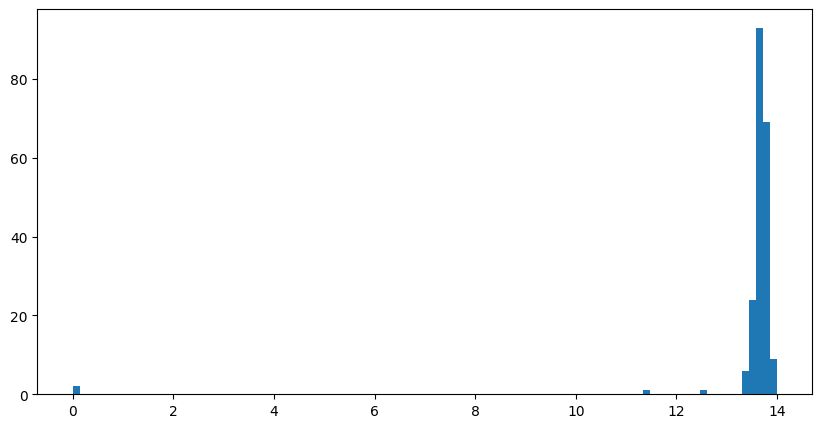

In [126]:
# Histogram of cantidad entregada
plt.figure(figsize=(10, 5))
plt.hist(of['Cantidad entregada'].astype(float), bins=100)
plt.show()

### It seems it follows a normal distribution but some of the values are 0 L . Why is that?

In [129]:
# Look at the duration of the OF which have a quantity delivered of 0
of[of['Cantidad entregada'].astype(float) == 0]['Duration']

26    0
27    0
Name: Duration, dtype: int64